### 4-4.ipynb
### 重點：

#如何將資料進行處理或純化並按照資料類型與探索需求，再對應至圖形類型。
#其次再進行資料無關的調整，像是圖表標題、色系或者刻度標籤等,強化探索性資料分析（Exploratory Data Analysis）的目的。
#讓其他經濟學家或社會科學家及讀者能一目暸然資料特徵及背後深意。

### 1. 探索性數據分析（EDA）：
#### 1）特徵分析。
#### 2）思考多種特徵尋找任何可能的關係或趨勢。

### 2. 特徵工程(Feature)和資料純化(Data Cleaning)：
#### 1）添加一些特徵。
#### 2）刪除冗餘特徵。
#### 3）將特徵轉換為適合建模型式。

### 3. 預測性建模

#### 1）運行基本算法。
#### 2）交叉驗證。
#### 3）集合運算。
#### 4）重要特徵提取。

## 先取出當年鐵達尼號的乘客資料,經整理後的EDA數據資料庫：

### Survived - 是否存活（0 =否; 1 =是）

### Pclass -   票價等級／旅客等級（1 = 1st; 2 = 2nd; 3 = 3rd）

### Name -     姓名Name

### Sex -      性別Sex

### Age -      年齡Age

### Sibsp -    兄弟姐妹/配偶人數Number of Siblings/Spouses Aboard

### parch -    父母/子女人數Number of Parents/Children Aboard

### Ticket -   票號Ticket Number

### Fare -     客運票價Passenger Fare

### cabin -    客艙Cabin

### Embarked - 登船港（C =瑟堡； Q =皇后鎮； S =南安普敦）(C = Cherbourg; Q = Queenstown; S = Southampton)

In [35]:
#讀取線上 CSV 檔-不限於本地檔案，只要有正確的 URL 以及網路連線就可以將網路上的任意 CSV 檔案轉成 DataFrame。
#將 Kaggle 著名的鐵達尼號競賽的 CSV 檔案從網路上下載並轉成 DataFrame：

In [36]:
import pandas as pd 

# 讀取原始鐵達尼號乘客數據
df = pd.read_csv("Titanic/Titanic/train.csv")
df.head(5)

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


In [37]:
#優化記憶體使用量
#用 df.info 查看 DataFrame 當前的記憶體用量：

In [38]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [39]:
# 選取對預測有幫助的特徵欄位
selected_features = ["Pclass", "Sex", "Age", "Embarked", "SibSp", "Parch", "Fare"]

X_train = df[selected_features]
X_train

,Pclass,Sex,...,Parch,Fare
0,3,male,...,0,7.2500
1,1,female,...,0,71.2833
...,...,...,...,...,...
889,1,male,...,0,30.0000
890,3,male,...,0,7.7500


In [40]:
y_train = df.Survived
y_train

0      0
1      1
      ..
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [41]:
#從最後一列可以看出鐵達尼號這個小 DataFrame 只佔了 315 KB。
#如果你是透過 Jupyter 筆記本來操作 pandas，也可以考慮用 Variable Inspector 插件來觀察包含 DataFrame 等變數的大小：

In [42]:
#這邊使用的 df 不佔什麼記憶體，但如果你想讀入的 DataFrame 很大，
#可以只讀入特定的欄位並將已知的分類型（categorical）欄位轉成 category 型態以節省記憶體（在分類數量數小時有效）：
#減少讀入的欄位數並將 object 轉換成 category 欄位，讀入的 df 只剩 135 KB。只需剛剛的 40 % 記憶體用量。

In [43]:
dtypes = {"Embarked": "category"}                 #欄位轉成 category 型態以節省記憶體
cols = ["PassengerId", "Name", "Sex", "Embarked"] #只選要用的欄位

# 讀取原始鐵達尼號乘客數據
# 若無網際網路，可直接讀取本書附檔 df = pd.read_csv("titanic/test.csv")
#df= pd.read_csv('http://bit.ly/kaggletrain',dtype=dtypes, usecols=cols)
df = pd.read_csv("Titanic/Titanic/test.csv", dtype = dtypes, usecols = cols)
df.head()
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Name         418 non-null    object  
 2   Sex          418 non-null    object  
 3   Embarked     418 non-null    category
dtypes: category(1), int64(1), object(2)
memory usage: 63.8 KB


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Name         418 non-null    object  
 2   Sex          418 non-null    object  
 3   Embarked     418 non-null    category
dtypes: category(1), int64(1), object(2)
memory usage: 10.5+ KB


In [45]:
df = pd.read_csv("Titanic/Titanic/test.csv", dtype = dtypes, usecols = cols)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Name         418 non-null    object  
 2   Sex          418 non-null    object  
 3   Embarked     418 non-null    category
dtypes: category(1), int64(1), object(2)
memory usage: 63.8 KB


In [46]:
#如果你正在處理巨大 CSV 檔案，要控制記憶體的用量，也可以透過 chunksize 參數來限制一次讀入的列數（rows）：

In [47]:
from IPython.display import display

# chunksize=4 表示一次讀入 4 筆樣本
reader = pd.read_csv('titanic/titanic/train.csv', chunksize=4, usecols=cols)
# 秀出前兩個 chunks
for _, df_partial in zip(range(2), reader):
    display(df_partial)

,PassengerId,Name,Sex,Embarked
0,1,"Braund, Mr. Owen Harris",male,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,3,"Heikkinen, Miss. Laina",female,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S


,PassengerId,Name,Sex,Embarked
4,5,"Allen, Mr. William Henry",male,S
5,6,"Moran, Mr. James",male,Q
6,7,"McCarthy, Mr. Timothy J",male,S
7,8,"Palsson, Master. Gosta Leonard",male,S


In [48]:
#3-(1) 讀入並合併多個 CSV 檔案成單一 DataFrame

#很多時候因為企業內部 ETL 或是數據處理的方式（比方說利用 Airflow 處理批次數據），相同類型的數據可能會被分成多個不同的 CSV 檔案儲存。
#假設在本地端 dataset 資料夾內有 2 個 CSV 檔案，分別儲存鐵達尼號上不同乘客的數據：

In [49]:
# 讀取原始鐵達尼號乘客數據
df = pd.read_csv("titanic/titanic/train.csv")
df.head(5)

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


In [50]:
pd.read_csv("titanic/titanic/List1.csv")

,PassengerId,Pclass,...,Cabin,Embarked
0,914,1,...,NaN,S
1,915,1,...,NaN,C
...,...,...,...,...,...
4,918,1,...,B36,C
5,919,3,...,NaN,C


In [51]:
#3-(2):2個DataFrames的內容雖然分別代表不同乘客，其格式卻是一模一樣。這種時候你可以使用 pd.concat 
#將分散在不同 CSV 的乘客數據合併成單一 DataFrame，方便之後處理：

#使用 reset_index 函式來重置串接後的 DataFrame 索引。
#pandas 函式預設的 axis 參數為 0，代表著以列（row）為單位做特定的操作。
#在 pd.concat 的例子中則是將 2 個同樣格式的 DataFrames 依照列串接起來。

In [52]:
pd.read_csv("titanic/titanic/List2.csv")

,PassengerId,Pclass,...,Cabin,Embarked
0,1014,1,...,C28,C
1,1015,3,...,NaN,S
2,1016,3,...,NaN,Q
3,1017,3,...,NaN,S
4,1018,3,...,NaN,S


In [53]:
#3-(3):同一筆數據的不同特徵值（features）常會放在不同檔案裡頭。以鐵達尼號的數據集舉例,要如何組合成一個檔案(水平串接)：

In [54]:
#讀取資料夾中相似名稱的檔案
from glob import glob
files = glob("titanic/titanic/List*.csv")

temp = pd.concat([pd.read_csv(f) for f in files])
temp.reset_index(drop=True)
temp.to_csv('titanic/titanic/List-Final.csv') 

In [55]:
#3-(4):將這2個CSV檔案，同列對應到同個乘客，可用 pd.concat 函式搭配 axis=1 將不同 DataFrames 依照行（column）串接：

In [56]:
#乘客名稱存檔：
pd.read_csv("titanic/titanic/feature1.csv")

,PassengerId,Pclass,Name
0,914,1,"Flegenheim, Mrs. Alfred (Antoinette)"
1,915,1,"Williams, Mr. Richard Norris II"
...,...,...,...
4,918,1,"Ostby, Miss. Helene Ragnhild"
5,919,3,"Daher, Mr. Shedid"


In [57]:
#年齡性別存檔：
pd.read_csv("titanic/titanic/feature2.csv")

,Sex,Age,...,Cabin,Embarked
0,female,NaN,...,NaN,S
1,male,21.0,...,NaN,C
...,...,...,...,...,...
4,female,22.0,...,B36,C
5,male,22.5,...,NaN,C


In [59]:
files = glob("titanic/titanic/Feature*.csv")  # 在Python，""引號內大小寫要區分
files
pd.concat([pd.read_csv(f) for f in files], axis=1)

,PassengerId,Pclass,...,Cabin,Embarked
0,914,1,...,NaN,S
1,915,1,...,NaN,C
...,...,...,...,...,...
4,918,1,...,B36,C
5,919,3,...,NaN,C


In [ ]:
#(5) 客製化 DataFrame 顯示設定 
#pandas 具智慧型處理能力，會盡可能地將 DataFrame 完整呈現出來，但可以改變預設的顯示方式。

#完整顯示所有欄位
#若 DataFrame 裡頭的欄位多， pandas 會自動省略某些中間欄位以保持頁面整潔：

In [60]:
import pandas as pd 

# 重新讀取原始鐵達尼號乘客數據
df = pd.read_csv("titanic/titanic/train.csv")
df

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
...,...,...,...,...,...
889,890,1,...,C148,C
890,891,0,...,NaN,Q


In [61]:
#如果想要顯示所有欄位，可以使用pd.set_option函式來改變display.max_columns 設定：注意 ... 消失了。

In [62]:
pd.set_option("display.max_rows", None)
df

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S
5,6,0,...,NaN,Q
6,7,0,...,E46,S
7,8,0,...,NaN,S
8,9,1,...,NaN,S
9,10,1,...,NaN,C


In [63]:
#行列互換：轉置（transpose）當前 DataFrame，垂直顯示所有欄位：

In [64]:
df.T.head(5)

,0,1,...,889,890
PassengerId,1,2,...,890,891
Survived,0,1,...,1,0
Pclass,3,1,...,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...",...,"Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,...,male,male


## DataFrame所有顯示設定：在 pandas 官方文件裡：

https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#frequently-used-options

In [65]:
#3-(6) :減少顯示的欄位長度
#使用 pd.set_option 函式來限制資料欄位的顯示長度：

In [67]:
from IPython.display import display

# 讀取原始鐵達尼號乘客數據
# 使用預設設定來顯示 DataFrame
df = pd.read_csv("titanic/titanic/train.csv")

In [68]:
print("display.max_colwidth 預設值：",pd.get_option("display.max_colwidth"))
display(df)
print("欄位的長度改變,這樣比較方便閱讀及目視分析：")
# 客製化顯示（global）
pd.set_option("display.max_colwidth", 12)
display(df)

display.max_colwidth 預設值： 50


,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S
5,6,0,...,NaN,Q
6,7,0,...,E46,S
7,8,0,...,NaN,S
8,9,1,...,NaN,S
9,10,1,...,NaN,C


欄位的長度改變,這樣比較方便閱讀及目視分析：


,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S
5,6,0,...,NaN,Q
6,7,0,...,E46,S
7,8,0,...,NaN,S
8,9,1,...,NaN,S
9,10,1,...,NaN,C


In [69]:
#3-(7)改變浮點數顯示位數
#除了欄位長度以外，你常常會想要改變浮點數（float）顯示的小數點位數：
#結果： Fare 欄位顯示小數點後二位數值。

#只要設定過的Option參數，會一直延用下去。例如：
#1. max_colwidth 會被套用到後面 DataFrame 的。 DataFrame 的 Name 欄位顯示寬度跟上一個 DataFrame 顯示是相同的(都被縮減)。

In [70]:
pd.set_option("display.precision", 2)  #precision表示小數位數
df.head(3)

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S


In [71]:
#3-(8):想要將所有調整過的設定還原初始化，可以執行("use_inf_as_na")：

In [72]:
pd.reset_option("use_inf_as_na")  #將所有上面的Option設定 恢復成初始值
df.head(3)

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S


In [73]:
#3-(9):其他常用的 options 包含：(可自行練習看看)

#max_rows #最多顯示列數（橫）
#max_columns #最多顯示行數 （縱）
#date_yearfirst （日期在前）

In [74]:
from IPython.display import display
# 重新讀取原始鐵達尼號乘客數據
df = pd.read_csv("titanic/titanic/train.csv")

pd.reset_option("use_inf_as_na")  #將所有上面Option設定恢復成初始值
pd.set_option("display.max_rows", 5)      #最多顯示8列
print("最多顯示3列(筆)資料")
display((df))
pd.set_option("display.max_columns", 5)   #最多顯示2列
print("最多顯示10行(筆)資料")
display((df))

最多顯示3列(筆)資料


,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
...,...,...,...,...,...
889,890,1,...,C148,C
890,891,0,...,NaN,Q


最多顯示10行(筆)資料


,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
...,...,...,...,...,...
889,890,1,...,C148,C
890,891,0,...,NaN,Q


In [75]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, ...",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings,...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,Heikkine...,female,26.0,0,0,STON/O2....,7.92,NaN,S
3,4,1,1,Futrelle...,female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, M...",male,35.0,0,0,373450,8.05,NaN,S


In [77]:
# 相關係數
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00e+00,-5.01e-03,-0.04,0.04,-0.06,-1.65e-03,0.01
Survived,-5.01e-03,1.00e+00,-0.34,-0.08,-0.04,8.16e-02,0.26
Pclass,-3.51e-02,-3.38e-01,1.00,-0.37,0.08,1.84e-02,-0.55
Age,3.68e-02,-7.72e-02,-0.37,1.00,-0.31,-1.89e-01,0.10
SibSp,-5.75e-02,-3.53e-02,0.08,-0.31,1.00,4.15e-01,0.16
Parch,-1.65e-03,8.16e-02,0.02,-0.19,0.41,1.00e+00,0.22
Fare,1.27e-02,2.57e-01,-0.55,0.10,0.16,2.16e-01,1.00


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.5)

<AxesSubplot:>

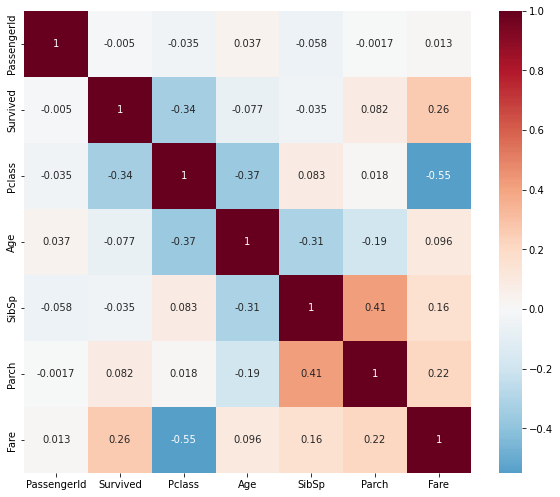

In [79]:
# 畫熱圖
sns.heatmap(df.corr(), center=0, cmap='RdBu_r', annot=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

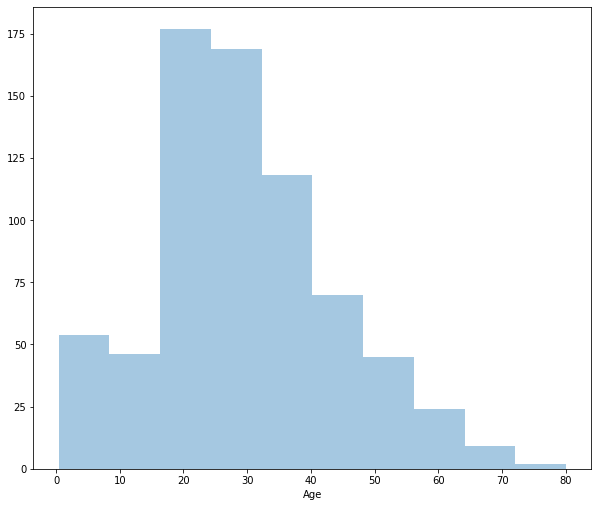

In [81]:
sns.distplot(df["Age"].dropna(), bins = 10, kde = False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

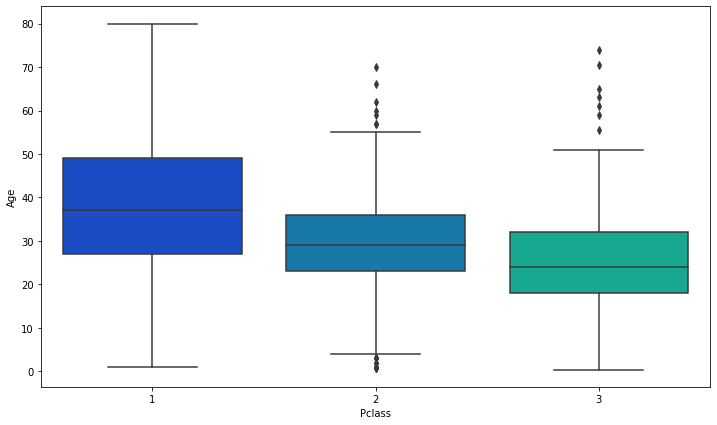

In [82]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

<AxesSubplot:>

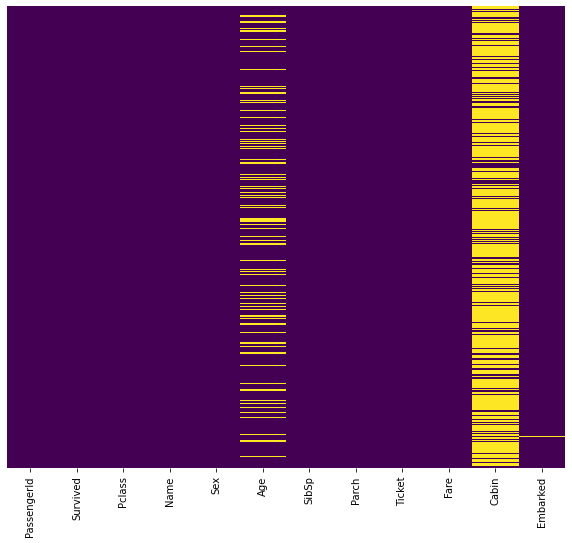

In [83]:
# 利用Heatmap檢視Nan欄位狀況 - 清理前
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [84]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1 :
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [85]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis = 1)

<AxesSubplot:>

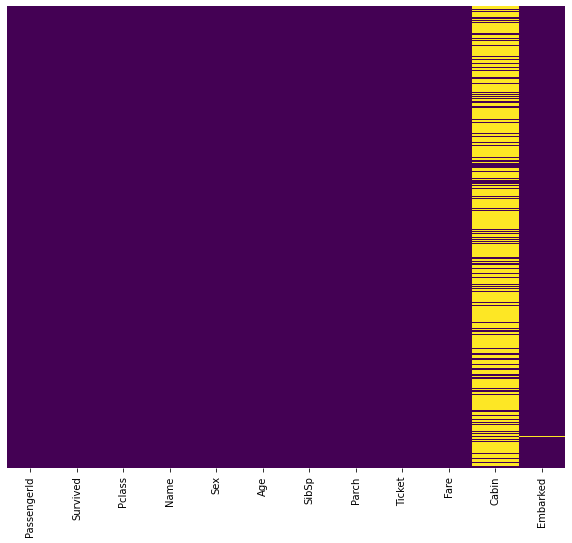

In [86]:
# 利用Heatmap檢視Nan欄位狀況 - 清理後
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [88]:
# drop Cabin Column
df = df.drop(columns = ["Cabin"])

In [87]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [89]:
# fillna Embarked Column
df = df.fillna({"Embarked": df["Embarked"].mode()[0]})

<AxesSubplot:>

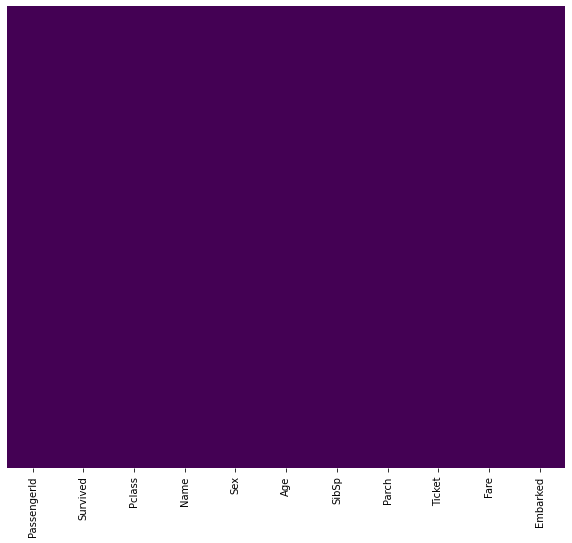

In [90]:
# 利用Heatmap檢視Nan欄位狀況 - 清理後
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [91]:
# Dataframe顯示亦可用設定值：pd.options.display.max_rows = 1

##  4樞紐分析法:pivot_table(),groupby():
### 4-(1) 統計分析上，找出一二個索引欄進行群組，用groupby()已經足夠。但大量欄位的群組，建議使用pivot_table()。
### 4-(2) pivot_table()(樞紐分析表)是各種電子表格程序和數據分析中一種常見的工具。它根據一個或多個鍵對數據進行樞紐，並根據行和列上分組將數據分配到各個矩形區域中。在Python和pandas中，可以通過groupby功能以及（能夠利用層次化索引的）重建運算製作透視表。
### 4-(3) 除了能為groupby提供便利之外，pivot_table()還可以添加分項小計（margins）：假設我們只想樞紐lifeExp(平均壽命)和pop(人口)，而且想根據year(年份)進行分組。
### 4-(4) 假設我們只想聚合tip_pct和size，而且想根據day進行分組。可將smoker放到列上，把day放到行上。
### 4-(5) 假設我想要根據sex和smoker計算分組平均數（pivot_table的默認聚合類型），並將sex和smoker放到行上。

In [92]:
pd.options.display.max_columns = 14
pd.options.display.max_rows = 8

In [94]:
# 讀取 CSV File
import pandas as pd  # 引用套件並縮寫為 pd  
df = pd.read_csv('WBdatasets/WBDataEN-10y.csv') 
df_1=df
df_1

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap,Two_Letter_Country_Code,iso_alpha,iso_num
0,0,Afghanistan,Asia,1950,29.22,8221506,728,AF,AFG,4
1,10,Afghanistan,Asia,1960,31.33,9856623,840,AF,AFG,4
2,20,Afghanistan,Asia,1970,35.26,12462862,778,AF,AFG,4
3,30,Afghanistan,Asia,1980,39.29,13681238,901,AF,AFG,4
...,...,...,...,...,...,...,...,...,...,...
1283,11836,Zimbabwe,Africa,2000,42.09,12157311,551,ZW,ZWE,716
1284,11846,Zimbabwe,Africa,2010,50.64,12697723,648,ZW,ZWE,716
1285,11856,Zimbabwe,Africa,2020,61.96,14862924,950,ZW,ZWE,716
1286,11866,Zimbabwe,Africa,2030,65.79,17596447,1724,ZW,ZWE,716


In [95]:
# 方法一：使用groupby
df_2 = df_1[["continent", "country", "lifeExp", "pop", "gdpPercap"]]
# =====
df_2.groupby(["continent", "country"]).mean()

lifeExp       pop  gdpPercap
continent country                                   
Africa    Algeria         63.43  2.65e+07    4497.33
          Angola          44.80  1.57e+07    3668.89
          Benin           52.19  6.43e+06    1234.44
          Botswana        58.94  1.35e+06    5923.22
...                         ...       ...        ...
Europe    Turkey          64.10  5.55e+07    7809.33
          United Ki...    75.70  5.93e+07   26921.56
Oceania   Australia       76.96  1.76e+07   29945.11
          New Zealand     76.23  3.51e+06   23029.11

[143 rows x 3 columns]

In [96]:
# 方法二：使用pivot_table
#現在假設我們只想聚合pop和lifeExp，而且想根據year進行分組。我將country放到列上，把day放到行上：
pd.options.display.max_columns = 14
pd.options.display.max_rows = 8

# =====
df_1.pivot_table(values = ["pop", "lifeExp"], index = "year", columns = "country")

lifeExp                                                     ...  \
country Afghanistan Albania Algeria Angola Argentina Australia Austria  ...   
year                                                                    ...   
1950          29.22   53.61   42.03  29.22     61.72     68.64   66.53  ...   
1960          31.33   62.60   47.26  33.20     64.84     70.69   68.72  ...   
1970          35.26   67.10   53.27  37.15     66.49     71.60   70.43  ...   
1980          39.29   69.82   60.03  39.76     69.36     74.24   72.78  ...   
...             ...     ...     ...    ...       ...       ...     ...  ...   
2000          41.98   74.57   70.26  40.99     73.91     79.75   78.39  ...   
2010          75.82   75.28   74.94  55.35     75.28     81.70   80.58  ...   
2020          77.15   76.82   77.08  61.59     76.82     83.25   81.79  ...   
2030          78.48   78.30   79.02  65.62     78.30     85.73   82.28  ...   

             pop                                                      \
country  Uruguay Venezuela    Vietnam West Bank and Gaza Yemen, Rep.   
year                                                                   
1950     2232565   5419168   26226439      1010185           4943429   
1960     2529063   7567092   31877101      1108056           5871285   
1970     2797147  10793210   42578572      1110798           7140559   
1980     2921806  14773885   53898711      1359962           9156167   
...          ...       ...        ...          ...               ...   
2000     3322986  23522361   78964487      3164165          17551353   
2010     3359275  28439940   87967651     41034933          23154855   
2020     3473730  28435940   97338579     44598032          29825964   
2030     3569471  33626469  104163519     48954034          36406888   

                             
country    Zambia  Zimbabwe  
year                         
1950      2651600   3060507  
1960      3259000   4025178  
1970      4263898   5514854  
1980      5746864   8584460  
...           ...       ...  
2000     10124602  12157311  
2010     13605984  12697723  
2020     18383955  14862924  
2030     24325505  17596447  

[9 rows x 286 columns]

In [97]:
#4-(6) margins，ALL參數的應用:
#可以對這個表作進一步處理，傳入margins=True添加加分小計。
#會添加標籤為ALL的行和列（初始值為mean平均值)，其值對應於單個等級中所有數據的分組統計。
#在下面這個例子中，ALL值為平均數。

In [98]:
pd.options.display.max_colwidth=13     #單一資料欄位內容顯示之長度
pd.options.display.max_columns = 11    #最多顯示多少筆資料
pd.options.display.max_rows =6         #最多顯示多少欄位


# =====
df_1.pivot_table(values = ["pop", "lifeExp"], index = "year", columns = "country", margins = True)

lifeExp                                   ...                pop  \
country Afghanistan Albania Algeria Angola Argentina  ... West Bank and Gaza   
year                                                  ...                      
1950          29.22   53.61   42.03  29.22     61.72  ...      1.01e+06        
1960          31.33   62.60   47.26  33.20     64.84  ...      1.11e+06        
1970          35.26   67.10   53.27  37.15     66.49  ...      1.11e+06        
...             ...     ...     ...    ...       ...  ...           ...        
2020          77.15   76.82   77.08  61.59     76.82  ...      4.46e+07        
2030          78.48   78.30   79.02  65.62     78.30  ...      4.90e+07        
All           49.98   69.98   63.43  44.80     70.91  ...      1.60e+07        

                                                   
country Yemen, Rep.    Zambia  Zimbabwe       All  
year                                               
1950       4.94e+06  2.65e+06  3.06e+06  1.67e+07  
1960       5.87e+06  3.26e+06  4.03e+06  1.97e+07  
1970       7.14e+06  4.26e+06  5.51e+06  2.42e+07  
...             ...       ...       ...       ...  
2020       2.98e+07  1.84e+07  1.49e+07  5.28e+07  
2030       3.64e+07  2.43e+07  1.76e+07  5.82e+07  
All        1.63e+07  1.00e+07  9.96e+06  3.59e+07  

[10 rows x 288 columns]

In [99]:
#4-(7):樞紐函數將其傳給參數aggfunc(默認為’mean’,平均值)。
#例如，使用count（筆數）或len（資料量）可以得到有關分組大小的交叉表。
#加上aggfunc參數，結果如下：

In [100]:
# lifeExp(平均壽命),pop(人口)二組資料同時顯示，視覺上太多太亂,只選一個項目(pop)再看一次。

In [101]:
#再觀察平均壽命，從1960年到2020年：
#不論落後國家或先進國家都增加8~20歲。主因應是戰亂減少及醫療進步。

In [102]:
pd.options.display.max_colwidth=8     #單一資料欄位內容顯示之長度
pd.options.display.max_columns = 12   #最多顯示多少筆資料
pd.options.display.max_rows = 8       #最多顯示多少個欄位


# =====
df_1.pivot_table(values = "pop", index = "year", columns = "country", aggfunc = "mean")

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,...,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,
1950,8221506,991432,8988260,3940830,1758...,8399947,...,5419168,2622...,1010185,4943429,2651600,3060507
1960,9856623,1627484,1070...,4720153,2061...,1036...,...,7567092,3187...,1108056,5871285,3259000,4025178
1970,1246...,2151756,1396...,5635902,2404...,1265...,...,1079...,4257...,1110798,7140559,4263898,5514854
1980,1368...,2671677,1888...,6674900,2839...,1474...,...,1477...,5389...,1359962,9156167,5746864,8584460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,2405...,3476322,3040...,1046...,3748...,1915...,...,2352...,7896...,3164165,1755...,1012...,1215...
2010,2918...,2948023,3597...,2335...,4089...,2215...,...,2843...,8796...,4103...,2315...,1360...,1269...
2020,3892...,2877797,4385...,3286...,4519...,2549...,...,2843...,9733...,4459...,2982...,1838...,1486...
2030,4809...,2786974,5036...,4483...,4905...,2817...,...,3362...,1041...,4895...,3640...,2432...,1759...


In [103]:
pd.options.display.max_colwidth=13     #單一資料欄位內容顯示之長度
pd.options.display.max_columns = 11   #最多顯示多少筆資料
pd.options.display.max_rows = 8       #最多顯示多少個欄位


# =====
df_1.pivot_table(values = "lifeExp", index = "year", columns = "country", aggfunc = "mean")

country,Afghanistan,Albania,Algeria,Angola,Argentina,...,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,
1950,29.22,53.61,42.03,29.22,61.72,...,39.42,42.16,31.98,41.22,47.64
1960,31.33,62.60,47.26,33.20,64.84,...,44.37,47.14,34.70,45.24,51.60
1970,35.26,67.10,53.27,37.15,66.49,...,49.29,54.57,38.70,49.17,54.98
1980,39.29,69.82,60.03,39.76,69.36,...,57.60,62.95,47.14,51.65,61.56
...,...,...,...,...,...,...,...,...,...,...,...
2000,41.98,74.57,70.26,40.99,73.91,...,72.08,71.86,59.39,39.61,42.09
2010,75.82,75.28,74.94,55.35,75.28,...,74.84,72.79,65.55,55.66,50.64
2020,77.15,76.82,77.08,61.59,76.82,...,75.47,74.21,66.12,64.44,61.96
2030,78.48,78.30,79.02,65.62,78.30,...,76.23,75.76,66.22,69.11,65.79


## 5. 交叉表 實例：crosstab:是一種特殊的pivot_table()，專用於計算分組頻率。

#### 交叉表(cross-tabulation,簡稱crosstab)是一種用於計算分組頻率的特殊透視表。

#### 實例：先創建一個簡單檔的資料。

In [104]:
import pandas as pd

data = pd.DataFrame({'Sample': range(1, 15), 'Gender': 
    ['Female', 'Male', 'Male', 'Female','Male', 'Male', 'Female', 'Male', 'Male', 'Female',
     'Female', 'Female', 'Female', 'Male'],
                     
    'Handedness': ['Right-handed', 'Right-handed', 'Left-handed', 
    'Left-handed','Left-handed', 'Left-handed', 'Right-handed', 'Right-handed', 'Left-handed', 
    'Left-handed', 'Right-handed', 'Left-handed', 'Right-handed', 'Left-handed'],
                     
    'skincolor': ['white', 'beige', 'Indian', 
    'brown','black', 'beige', 'beige', 'white', 'Indian', 
    'Indian', 'brown', 'white', 'black', 'white'],                    
    })
data.head()

,Sample,Gender,Handedness,skincolor
0,1,Female,Right-handed,white
1,2,Male,Right-handed,beige
2,3,Male,Left-handed,Indian
3,4,Female,Left-handed,brown
4,5,Male,Left-handed,black


In [105]:
pd.crosstab(data.Gender,data.Handedness,margins=True)

Handedness,Left-handed,Right-handed,All
Gender,,,
Female,3,4,7
Male,5,2,7
All,8,6,14


In [106]:
#6. 進行較複雜的邏輯性分析：(先定假設，再驗證假設是否成立)

#鐵達尼號船難事件背景：1912年4月14日深夜至15日凌晨在北大西洋發生船難的，在1920年調查終結後，法院將乘客資料建檔；以這個資料來進行數據進行分析。
#分析前，先進行假說設立；即定義分析的目標：什麼樣特徵的乘客，在船難發生時的存活率最大？

#假設如下：
#(1) 越有錢的人，存活率越高。
#(2) 男性會優先讓女性下船，因此女性的存活率較高。
#(3) 團體乘客因危險發生時可能會互幫忙，故存活率較單獨乘各高。
#先把檔案引入，並看一下檔案結構:

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
 
df = pd.read_csv("titanic/titanic/train.csv")

#Dataframe顯示設定
pd.set_option("display.max_colwidth", 15)  #單一資料欄位內容顯示之長度
pd.set_option("display.max_rows", 20)              #最多顯示多少筆資料
pd.set_option("display.max_columns", 100)          #最多顯示多少個欄位

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.92,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.05,NaN,S


In [110]:
#7. groupby統計分析：
#7-(1)使用groupby 搭配 describe 函式來匯總各組的統計數據：觀察不同性別的確基本統計資料：

In [111]:
df.groupby("Sex").Survived.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.74,0.44,0.0,0.0,1.0,1.0,1.0
male,577.0,0.19,0.39,0.0,0.0,0.0,0.0,1.0


In [112]:
#7-(2) 將所有乘客（列）依照它們的艙等(Pclass)欄位值進行分組(groupby)：

In [113]:
df.groupby('Pclass').Age.mean()

Pclass
1    38.23
2    29.88
3    25.14
Name: Age, dtype: float64

In [114]:
#7-(3) 加入不同欄位（Sex)再進行分組，並利用 size 函式取得各組人數：

In [115]:
df.groupby(["Sex", 'Pclass']).size().unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [116]:
#7-(4) 再用 agg 函式（aggregate，匯總）搭配 groupby 函式進行每一組樣本依照多種方式匯總：

In [117]:
df.groupby(["Sex", 'Pclass']).Age.agg(['min', 'max', 'count'])

min   max  count
Sex    Pclass                   
female 1       2.00  63.0     85
       2       2.00  57.0     74
       3       0.75  63.0    102
male   1       0.92  80.0    101
       2       0.67  70.0     99
       3       0.42  74.0    253

In [118]:
#7-(5) 使用樞紐分析表 pivot_table 函式來匯總各組數據：

In [119]:
df.pivot_table(index='Sex', 
               columns='Pclass', 
               values='Age', 
               aggfunc=['min', 'max', 'count'])

min               max             count         
Pclass     1     2     3     1     2     3     1   2    3
Sex                                                      
female  2.00  2.00  0.75  63.0  57.0  63.0    85  74  102
male    0.92  0.67  0.42  80.0  70.0  74.0   101  99  253

In [120]:
#7-(6) 透過 分組groupby 的 unstack 函式也能產生跟 pivot_table 函式相同的結果：

In [121]:
df.groupby(["Sex", 'Pclass']).Age.agg(['min', 'max', 'count']).unstack()

min               max             count         
Pclass     1     2     3     1     2     3     1   2    3
Sex                                                      
female  2.00  2.00  0.75  63.0  57.0  63.0    85  74  102
male    0.92  0.67  0.42  80.0  70.0  74.0   101  99  253

### 8. 用tramsform輔助groupby進行統計：

#### 用groupby函式來結合原始數據，進行匯總。不管是groupby搭配agg還是pivot_table()，匯總結果都會以另一個全新的DataFrame表示。
#### 若想直接把各組匯總的結果放到原本的DataFrame中，方便比較原始樣本與匯總結果的差異。這時可以用 transform 函式,用法如下：

In [123]:
#Dataframe顯示設定
pd.set_option("display.max_colwidth", 18)  #單一資料欄位內容顯示之長度
pd.set_option("display.max_rows", 8)               #最多顯示多少筆資料
pd.set_option("display.max_columns", 20)           #最多顯示多少個欄位

df['Avg_age'] = df.groupby("Sex").Age.transform("mean")


# =====
df['Over_avg_age'] = df.apply()
df

TypeError: DataFrame.apply() missing 1 required positional argument: 'func'

In [ ]:
#將乘客依性別 Sex 分組後，再計算出各組平均年齡 Age，用 transform 函式將各組結果放入對應的乘客（列）資料。
#你會發現兩名男乘客跟平均男性壽命 Avg_age 欄位相比正好一上一下，這差異則反映到 Above_avg_age 欄位裡頭。

In [ ]:
#為了證明假說是否成立，觀察在不同的船艙，性別與生存關係，是否有明確的差異? 
#以 pclass（船艙等級）、sex(性別)、survived(是否存活) 來檢視資料。

#以三個欄位（艙等，性別，存活與否）進行樞紐分析(index 以固定欄位)

In [ ]:
titanic_age = df.pivot_table(index=['Pclass','Sex', 'Survived'])
titanic_age

## 9. DataFrame顯示強調重點：style函式

In [ ]:
(df.loc[:10, 'Sex':]                                              #只列出10筆索引出來資料
 .style
 .highlight_max(subset=['Avg_age'],color='pink')                  #標示出最大值並用底色強化
 .applymap(lambda x: 'background-color: rgb(52, 244, 247)',       #標示索引底色
           subset=pd.IndexSlice[[0, 7], ['Age','Over_avg_age']])) #標示索引範圖（0-10筆）

In [ ]:
#細緻的視覺呈現，可使用pandas Styler下的format函式來完成：
#pd.DataFrame.style 會回傳一個 Styler。
#除了format函式以外，尚有其他函式為DataFrame添加樣式。使用format函式的好處是不會如round等函式將修改數值，只是改變呈現結果而已。
#styling技巧的重要性是：不需畫圖就能分享分析結果，凸顯重要的數據。

#將所有可能的DataFrame Style技巧用在以下的例子說明：

In [ ]:
(df.style
     .format('{:.1f}', subset='Age')                            #將 Age 欄位的數值顯示限制到小數後第一位
     .format('{:.2f}', subset='Fare')                           #將 Fare 欄位的數值顯示限制到小數後第二位
     .highlight_max(subset=['Avg_age'],color='pink')            #標示Ave_age欄位最大值並用底色強化
 
     .set_caption('★☆★☆== 根據1920年鐵達尼號 船難事件 調查報告 乘客資料表 ==☆★☆★') #添加一個標題輔助說明
     .hide_index()                                              #隱藏索引欄（最左邊）
 
     .bar('Age', vmin=0,color='black')                          #將Age欄位依數值大小畫條狀圖(黑色)
     .highlight_max('Survived',color='lightblue')               #標示出特定欄位(Survived)最大值並底色強化
     .highlight_min('Pclass',color='lightgreen')                #標示出特定欄位(Pclass)最大值並底色強化
     .background_gradient('Greens', subset='Fare')
     .highlight_null()                                          #將整個 DataFrame 的空值顯示底色為紅色
)

## 10. 進階篩選filter：條件式選取

#### 篩選條件一：為女性且年齡60歲以上且住在頭等艙且存活者。共有四個條件同時成立。即經濟條件好的乘客並存活者。

In [ ]:
df_filter = (df.Sex == 'female') & (df.Age > 60) & (df.Survived==1) & (df.Pclass==1)
(df[df_filter]
    .style
    .format('{:.1f}', subset='Age')                            #將 Age 欄位的數值顯示限制到小數後第一位
    .format('{:.2f}', subset='Fare')                           #將 Fare 欄位的數值顯示限制到小數後第二位
    .applymap(lambda x: 'background-color: rgb(233, 160, 215)', 
              subset=pd.IndexSlice[:, 'Sex':'Age']))

#這種篩選方式與df[(df.Sex == 'female') & (df.Age > 60) & (df.Survived==1) & df.Pclass==1] 結果相同

In [ ]:
#篩選條件二：男性且住在低等艙且不幸死亡者。

In [ ]:
df_filter = (df.Sex == 'male') & (df.Survived==0) & (df.Pclass==3)
(df[df_filter]
    .style
    .format('{:.1f}', subset='Age')                            #將 Age 欄位的數值顯示限制到小數後第一位
    .format('{:.2f}', subset='Fare')                           #將 Fare 欄位的數值顯示限制到小數後第一位
    .applymap(lambda x: 'background-color: rgb(233, 160, 215)', 
              subset=pd.IndexSlice[:, 'Sex':'Age']))

# 與 df[(df.Sex == 'male') & (df.Survived ==0) & df.Pclass==3] 結果相同

## 11. 用Plot視覺化進行探索型數據分析（Exploratory Data Analysis, EDA）時，可用一些簡單的Plot.kind函式來達成。

#### kind : str
####   ‘line’ : line plot (default)#折線圖
####   ‘bar’ : vertical bar plot#長條圖
####   ‘barh’ : horizontal bar plot#横向長條圖
####   ‘hist’ : histogram#柱状圖
####   ‘box’ : boxplot#箱線圖
#### ‘kde’ : Kernel Density Estimation plot #Kernel 的密度估計圖，主片要對柱收圖添加Kernel機率密度線
####   ‘density’ : same as ‘kde’
####   ‘area’ : area plot #折線陰影圖
####   ‘pie’ : pie plot#圓餅圖
####   ‘scatter’ : scatter plot#散點圖  需要傳入columns方向的索引

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')#設定matplotlib圖形庫中內訂樣式
df.groupby("Pclass").Survived.count().plot(kind='bar');

## 12. 視覺分析技巧：先就資料結構及分析敍述。
#### 12-(1) df.pivot_tabe()函式，value:可用來觀察特定數據，作法如下：
#### 觀察分析艙等(Pclass)，性別(Sex)，是否存活(三項變數)對年齡(age)的影響。根據假說，觀察在不同的船艙，年齡是否有明確的差異? 
#### 想要以 pclass（船艙等級）、sex(性別)、survived(是否存活) 來檢視資料。

In [ ]:
#12-(2) :設定樞紐條件index：設定一個欄位並以 index=’age’ 方式呈現，也可設定複數個參數，並以List 以階層狀的方式呈現數據。
#發現，有些欄位沒有被顯示出來。原因是因為這些數據是無法被統計的欄位，計算中會被當成遺棄值（redundent）拋棄，因此不會顯示。
#可得到下列結論並和前面假設做比較：
#頭等艙（pclass = 1）：存活的男性與女性年紀差異不明顯，未能存活的年紀女性明顯比男性為低。
#商務艙（pclass = 2）：多由年紀明顯較小的乘客存活，也許該層的家庭出遊人數較多？此處就能夠在繼續往下進行數據探索。
#經濟艙（pclass = 3）：經濟艙的平均年齡(19-22)明顯較頭等艙與商務艙低，可能年紀會影響消費能力，因此年紀較輕的乘客選擇搭乘經濟艙較多。

In [ ]:
df_pclass_age = df.pivot_table(index=['Pclass', 'Sex', 'Survived'], values='Age')
df_pclass_age

In [ ]:
#12-(3):善用樞紐表的參數來協助分析：為了分析不同性別與年齡的乘客存活率－以性別(Sex)為索引，列出是否存活(Survived)的比較資料。
#再分析不同性別與年齡的乘客存活率：以性別(Sex)為索引，列出是否存活(Survived)的分析表

In [ ]:
#這表看不出來，性別和生存率的關係；說明性別和是否存活無關。

In [ ]:
df_sex_sur = df.pivot_table(index=['Sex'], columns='Survived')
df_sex_sur

In [ ]:
#12-(4):統計分析：describe()函式，設定樞紐表中的 aggfunc 以統計存活人數，分別以性別(Sex)及艙等(Pclass)為索引，
# 對是否存活(Survived)進行樞紐分析：

In [ ]:
df.describe()

In [ ]:
#12-(5)：設定 aggfunc 以統計存活人數，分別以性別(Sex)及艙等(Pclass)為索引，對是否存活(Survived)進行樞紐分析：

In [ ]:
# 對於數值 sex,survived分別進行平均值和計數
df_age_sur = df.pivot_table(index=['Sex'], values='Survived', margins=True, aggfunc=['mean', 'count'])
df_age_sur

In [ ]:
df_age_sur = df.pivot_table(index=['Pclass'], values='Survived', margins=True, aggfunc=['mean', 'count'])
df_age_sur

In [ ]:
#12-(6):分析結果：
#女性的存活率高，再進一步思考女性存活人數是不是佔存活人數的多數，這時可用aggfunc來協助。
#發現女性雖然生存率較高，雖然只佔存活人數的少數25%，部分原因應是因為原先乘客的性別比率，男性就佔了 64.7%；女性存活率只是略少於男性。
#由性別和生存率的關係，女生的生存率是男生的好幾倍，也許就像電影中描述的一樣，男性讓女性先下船。

In [ ]:
#12-(7):加輔助數據欄及註記欄：為了進行較複雜的資料處理，適度加上一些輔助數據欄及註記欄，再回頭重複進行上述分析，
#看看是否可以發現新結果。

In [ ]:
#insert 函式：
#對某一軸（columns）套用相同來運算：對 DataFrame 裡頭的每一個欄位（縱軸）或是每一列（橫軸）做相同的運算。
#再回頭取用「鐵達尼號船難」資料內的 Survived 數值欄位轉換較容易理解的字串。

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 重新讀取原始鐵達尼號乘客數據
# 若無網際網路，可直接讀取本書附檔 df = pd.read_csv("titanic/test.csv")

df_titanic = pd.read_csv("titanic/train.csv")
df_titanic = df_titanic.drop("Name", axis=1)

# 複製一份副本 DataFrame
df_change1 = df_titanic.copy()

print("原始檔案：")
display(df_change1.head())
columns = df_change1.columns.tolist()[:4] #只留下4個欄位

# 創建新的欄位名稱「存活]
new_col = '是否存活'

columns.insert(2, new_col)  # 將新欄位放在編號2的欄位
df_change1[new_col] = df_change1.Survived.apply(lambda x: '存活' if x else '死亡')
print("用apply函數增加欄位「是否存活」之後，檔案改成：")
df_change1

# 排序切割後的 categorical 欄位
(df_change1.sort_values(new_col, ascending=False)
   .reset_index()
   .loc[:12, columns])

In [ ]:
#13. apply:增加欄位一次取出做運算並產生一個新的值,是 pandas 裡最重要的技巧之一
#13-(1): apply作法如下：:
#定義一個Python function並將apply函式套用到DataFrame上
#根據原有欄位之值(age, sex),加上一些文字，再放到一個最新欄位中「Memo備註欄」
#apply 函式將 generate_desc 函式套用到DataFrame中的每一個樣本(row)，結合 Sex 及 Age 兩欄位內的資訊，生成新的欄位「Memo備註欄」。
#將axis設置為0則可以對每一個欄位分別套用自定義的 Python function。

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 重新讀取鐵達尼號數據

df_titanic = pd.read_csv("titanic/train.csv")
df_titanic = df_titanic.drop("Name", axis=1)

df_change2 = df_titanic.copy()
print("原始檔案：")
display(df_change2.head())

# apply function
d = {'male':'男性', 'female': '女性'} 
def generate_desc(row):
    return f" {row['Age']} 歲{d[row['Sex']]}"

print("用apply函數增加欄位「Memo備註欄」之後，檔案改成：")
df_change2['Memo備註欄'] = df_change2.apply(generate_desc, axis=1)
df_change2

In [ ]:
#13-(2):cut:將連續數值轉換成分類數據
#   把一個連續數值（numerical）的欄位分類成多個groups以便對每個groups做統計。
#   用 pd.cut 函式建立出來的每個分類:族群 X 有大小之分，可以使用 sort_values 函式排序樣本。
#   pd.cut 函式用法如下：

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("titanic/train.csv")
df_change3 = df_titanic.copy()
print("原始檔案：")
display(df_change3.head())

# 為了方便比較新舊欄位
columns = df_change3.columns.tolist()
new_col = '年齡區間'
columns.insert(4, new_col)

# 將 numerical 轉換成 categorical 欄位
labels = [f'群組{i}' for i in range(1, 11)]
df_change3[new_col] = pd.cut(x=df_change3.Age, 
                     bins=10, 
                     labels=labels)

print("用cut函數運算後增加欄位「年齡區間」之後，檔案改成：")
# 排序切割後的 categorical 欄位, 列出0-5筆(columns)資料
(df_change3.sort_values(new_col, ascending=False)
   .reset_index()
   .loc[:5, columns]
)

In [ ]:
#12-(3) 資料隨機分拆：用sample, drop函式將DataFrame 隨機切成兩個子集。
#為何在資料處理過程中，要將DataFrame隨機切成兩個獨立的子集：將資料分成二組，以便選取其中一個子集來進行不同的訓練機器學習模型。
#pandas的sample函式：前提是原來的 DataFrame df_titanic 的索引是獨一無二的。另外設定 random_state 以便日後重現結果。

#sample用法：
#DataFrame.sample（n =無，frac =無，replace = False，權重=無，random_state =無，軸=無）

#參數：

#n：     int值，要生成的隨機行數。
#frac：  浮點值，返回（浮點值*數據幀值的長度）。 frac不能與n一起使用。
#replace：布林值，如果為True，則返回帶有替換值的樣本。
#random_state： int值或numpy.random.RandomState，二種設定方式。如果為特定整數，則每次迭代將返回與sample相同的行。
#axis：0 或'row' 表示行, 1 或 'column'表示列。

In [ ]:
# sample,drop:從原始檔案中分割成二個檔案
df_train = df_titanic.sample(frac=0.8, random_state=5743) #0.8即從原始檔隨機取樣80%的資料,5566是在記錄此次選用資料
df_test = df_titanic.drop(df_train.index) #直接將原始檔中的取樣值丟掉，留下的是未被取樣的

print("將原始檔案 DataFrame 分割成二個不同大小的DataFrame：原始檔案：%i  分割成二個檔案大小分別為：%i 及 %i"
      % (len(df_titanic),len(df_train),len(df_test)))

#Dataframe顯示設定
pd.set_option("display.max_colwidth", 15)  #單一資料欄位內容顯示之長度
pd.set_option("max_rows", 5)               #最多顯示多少筆資料
pd.set_option("max_columns", 11)           #最多顯示多少個欄位

# 顯示分割結果
display(df_train)
display(df_test)

In [ ]:
#14. 篩選高頻率資料技巧(str下的contains函式)。
#針對欄位「Ticket」, 取出最常出現(7次，6次）
#當時鐵達尼號上有7位乘客使用官員票(1601是官員用票)。

In [ ]:
df = df_titanic.copy()
print("原始資料：")
display(df)
print("用count函式，取出出現頻率最高的資料：")
display(df.Ticket.value_counts().head(5).reset_index())

#Dataframe顯示設定
pd.set_option("display.max_colwidth", 15)  #單一資料欄位內容顯示之長度
pd.set_option("max_rows", 8)              #最多顯示多少筆資料
pd.set_option("max_columns", 11)          #最多顯示多少個欄位

#查詢資料：str下的contains函式
print("用contains函式，取出所有船票為1601的乘客資料：")
df[df.Ticket.str.contains("1601")].head(10) #票種最常出現的(Ticket=1601)查看其存活狀況

In [ ]:
#練習一：
#針對鐵達尼號的乘客資料,不分船員及乘客，即將船員及乘客（cabin=NaN)混合在一起，分析人員，年齡與生存關係，是否有明確的差異? 
#以 pclass（船艙等級）、sex(性別)、survived(是否存活) 來檢視資料。

#1. 以三個欄位（艙等，性別，存活與否）進行樞紐分析(index 以固定欄位)
#2. 敍述一下，你觀察到的結果。

In [ ]:
# 對數值 Pclass,survived分別進行平均值和計數
df_age_sur = df.pivot_table(index=['Pclass','Sex'], values='Survived', 
                            margins=True, aggfunc=['mean', 'count'])
df_age_sur

In [ ]:
df_filter =(df.Survived==0)  #(df.Sex == 'male') & & (df.Pclass==3)
(df[df_filter]
    .style
    .format('{:.1f}', subset='Age')              #將 Age 欄位的數值顯示限制到小數後第一位
    .format('{:.2f}', subset='Fare')             #將 Fare 欄位的數值顯示限制到小數後第一位
    .applymap(lambda x: 'background-color: rgb(233, 160, 215)', 
              subset=pd.IndexSlice[:, 'Sex':'Age']))

# 與 df[(df.Sex == 'male') & (df.Survived ==0) & df.Pclass==3] 結果相同

In [ ]:
#練習二：
#針對鐵達尼號的乘客資料,對於數值 艙等Pclass,survived分別進行平均值和計數？
#敍述一下，你觀察到的結果。

In [ ]:
#解答：titanic_age = df.pivot_table(index=['Cabin','Age', 'Survived'])
titanic_age